#  Практическая работа №1. Поповец Наталья, ММР-213.
Dataset IMBd Top 250 movies
Ссылка: https://www.kaggle.com/datasets/yehorkorzh/imdb-top-250-movies 

In [5]:
import pandas as pd
import numpy as np

In [6]:
movies = pd.read_csv('imdb_top250_movies.csv')

In [7]:
movies_houses = pd.read_csv('imdb_top250_movies.csv', sep =',')

In [194]:
movies

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie
3,3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary,1,great movie,1,last decade movie
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,246,The Lost Weekend,1945,1946-01-01,101 min,"Drama, Film-Noir",Billy Wilder,"Charles R. Jackson (from the novel by), Charle...",English,USA,Won 4 Oscars. Another 12 wins & 3 nominations.,8.0,"26,834",NaN,Paramount Pictures,1,okay movie,0,very old movie
246,246,247,Short Term 12,2013,2013-08-23,96 min,Drama,Destin Daniel Cretton,Destin Daniel Cretton,English,USA,35 wins & 70 nominations.,8.0,"62,348",NaN,Cinedigm,1,okay movie,0,modern movie
247,247,248,His Girl Friday,1940,1940-01-18,92 min,"Comedy, Drama, Romance",Howard Hawks,"Charles Lederer (screen play), Ben Hecht (from...","English, French",USA,2 wins.,8.0,"43,551",NaN,Columbia Pictures,1,okay movie,0,very old movie
248,248,249,The Straight Story,1999,1999-11-03,112 min,"Biography, Drama",David Lynch,"John Roach, Mary Sweeney",English,"France, UK, USA",Nominated for 1 Oscar. Another 14 wins & 37 no...,8.0,"67,045",NaN,Buena Vista Pictures,1,okay movie,0,new era movie


Строка выше демонстрирует выбранный датасет, который содержит 250 строк и 23 столбца.

In [195]:
movies.columns

Index(['Unnamed: 0', 'Num', 'Title', 'Year', 'Released', 'Runtime', 'Genre',
       'Director', 'Writer', 'Language', 'Country', 'Awards', 'imdbRating',
       'imdbVotes', 'BoxOffice', 'Production', 'Most voted', 'Rating Category',
       'Most Recomended', 'Year Category'],
      dtype='object')

Данная строчка вывела названия всех колонок, имеющихся в датасете.

In [196]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       250 non-null    int64         
 1   Num              250 non-null    int64         
 2   Title            250 non-null    object        
 3   Year             250 non-null    int64         
 4   Released         248 non-null    datetime64[ns]
 5   Runtime          250 non-null    object        
 6   Genre            250 non-null    object        
 7   Director         250 non-null    object        
 8   Writer           249 non-null    object        
 9   Language         250 non-null    object        
 10  Country          250 non-null    object        
 11  Awards           245 non-null    object        
 12  imdbRating       250 non-null    float64       
 13  imdbVotes        250 non-null    object        
 14  BoxOffice        75 non-null     object   

С помощью комады info мы смогли отобразить основную информацию по нашему датасету - тип, range index, количество рядов с пропущенными значениями. В данном случае у нас есть пропущенные ряды в стобцах Released,  Writer, Awards, Metascore, DVD, BoxOffice, Website. На первый взгляд может показаться, что столбцов с неполным количеством данных много, но нужно учесть, что тема датасета - рейтинг фильмов и отстувует не критическая информация. Основаня информация для ранжирования кино присутствует. К сожалению, наибольшие пробелы в информации зарегистрированы по кассовым сборам (BoxOffice).
Касаемо типа данных - превалирующая часть данных вещественная (18), также присутствуют вещественные (2) и целые числа (3).

In [197]:
movies['Year'].unique()

array([1994, 1972, 1974, 2008, 1957, 1993, 2003, 1999, 2001, 1980, 2010,
       2002, 1975, 1990, 1977, 1995, 1946, 1991, 1998, 1931, 2014, 1936,
       1942, 1960, 1981, 1954, 2006, 1985, 2000, 1979, 1940, 1950, 1964,
       2012, 1984, 1986, 1941, 1959, 1958, 1983, 1992, 1944, 1962, 1921,
       1971, 2004, 1952, 1976, 1973, 1968, 1987, 2017, 2009, 1997, 1948,
       1989, 2005, 1949, 1961, 1963, 1988, 1925, 1939, 1926, 2015, 2016,
       1982, 2011, 2013, 1996, 1978, 1967, 1934, 2007, 1969, 1945, 1953,
       1947, 1966, 1951, 1955, 1930, 1935, 1956, 1970], dtype=int64)

Выше отображены все года, присутсвующие в датасете.

In [198]:
movies['Genre'].unique()

array(['Crime, Drama', 'Action, Crime, Drama',
       'Biography, Drama, History', 'Adventure, Drama, Fantasy', 'Drama',
       'Comedy, Drama, Romance', 'Action, Adventure, Fantasy',
       'Action, Adventure, Sci-Fi', 'Action, Sci-Fi',
       'Crime, Drama, Mystery', 'Drama, Family, Fantasy',
       'Crime, Drama, Thriller', 'Drama, War', 'Adventure, Drama, Sci-Fi',
       'Comedy, Drama, Family', 'Drama, Romance, War',
       'Crime, Drama, Fantasy', 'Horror, Mystery, Thriller',
       'Action, Adventure', 'Biography, Drama, Music',
       'Mystery, Thriller', 'Drama, Music', 'Action, Sci-Fi, Thriller',
       'Adventure, Comedy, Sci-Fi', 'Action, Adventure, Drama',
       'Animation, Adventure, Drama', 'Drama, Mystery, Sci-Fi',
       'Comedy, Drama, War', 'Drama, Film-Noir', 'Horror, Sci-Fi',
       'Comedy', 'Drama, Western', 'Drama, Horror', 'Action, Thriller',
       'Animation, Adventure, Family', 'Drama, Romance', 'Drama, Mystery',
       'Action, Adventure, Mystery', 'Myster

Выше отображены все жанры фильмов, присутсвующие в датасете. 
Проверим, есть ли в датасете российские фильмы.

In [199]:
movies[movies['Country'] == 'Russia'].shape

(0, 20)

В данном датасете отсутствуют российские фильмы. Теперь проверим, фильмы каких стран включены в базу данных. 

In [200]:
movies['Country'].unique()

array(['USA', 'USA, UK', 'USA, New Zealand', 'USA, Germany',
       'New Zealand, USA', 'France', 'USA, UK, Canada, Iceland',
       'France, Poland, Germany, UK', 'USA, Hong Kong', 'USA, France',
       'UK, USA', 'Italy, USA', 'UK', 'Ireland, Canada, UK, USA',
       'USA, Canada, Australia', 'USA, Hong Kong, UK', 'France, USA',
       'USA, UK, Germany', 'Australia, USA',
       'Lebanon, Libya, Kuwait, Morocco, UK', 'Germany, USA', 'Australia',
       'Ireland, UK, USA', 'UK, Germany, USA', 'UK, South Africa, Italy',
       'Ireland, Denmark, Belgium, Luxembourg, France', 'Italy',
       'USA, Canada', 'USA, Austria, Switzerland',
       'UK, France, West Germany', 'UK, India, USA', 'UK, USA, Ireland',
       'USA, India, United Arab Emirates', 'UK, Australia, USA',
       'Netherlands, Denmark, UK, France, Finland, Sweden, Germany, Italy, Norway',
       'UK, USA, Australia', 'Hong Kong, Taiwan, USA', 'France, UK, USA',
       'UK, France, USA'], dtype=object)

Ниже отразим количество строк, которые содержат фильмы с 2012 по 2022 гг, рейтингом не ниже 8.7, произведенные в США

In [201]:
movies[(movies['Year'] >= 2012) & (movies['Year'] <= 2022) & 
      (movies['imdbRating'] <= 8.7) &
      (movies['Country'] == 'USA')].shape

(14, 20)

Теперь выведем все фильмы, по которым нет информации о наличии наград.

In [202]:
movies[movies['Awards'].isna()]

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
119,119,120,The Message,1976,1977-07-08,177 min,"Adventure, Biography, Drama",Moustapha Akkad,"H.A.L. Craig, Tewfik El-Hakim, A.B. Jawdat El-...","English, Arabic","Lebanon, Libya, Kuwait, Morocco, UK",NaN,8.3,"36,301",NaN,Anchor Bay Entertainment,1,good movie,0,quite old movie
138,138,139,Life of Brian,1979,1979-08-17,94 min,Comedy,Terry Jones,"Graham Chapman, John Cleese, Terry Gilliam, Er...","English, Latin",UK,NaN,8.1,"291,865",NaN,Warner Bros. Pictures,1,okay movie,0,quite old movie
165,165,166,Spider-Man: Homecoming,2017,2017-07-07,133 min,"Action, Adventure, Sci-Fi",Jon Watts,"Jonathan Goldstein (screenplay), John Francis ...",English,USA,NaN,8.1,"64,044","$117,027,503",Sony Pictures,1,okay movie,0,fresh movie
203,203,204,Guardians of the Galaxy Vol. 2,2017,2017-05-05,136 min,"Action, Adventure, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...",English,USA,NaN,8.1,"175,272","$380,236,369",Walt Disney Pictures,1,okay movie,0,fresh movie
218,218,219,The Killing,1956,1956-06-06,85 min,"Crime, Drama, Film-Noir",Stanley Kubrick,"Stanley Kubrick (screenplay), Jim Thompson (di...",English,USA,NaN,8.0,"65,940",NaN,United Artists,1,okay movie,0,quite old movie


Всего 5 фильмов, по которым не указаны награды - The Message, Life of Brian, Spider-Man: Homecoming, Guardians of the Galaxy Vol. 2, The Killing.
Стоит отметить, что большинство из них были сняты в прошлом столетии, однако в данном списке есть два фильма 2017 года. Не просмотривается закономирености в жанрах, продолжительности фильмов или режисерах. 

Узнаем название новейших фильмов в рейтинге

In [203]:
movies.sort_values(by=['Year'], ascending=[False])

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
203,203,204,Guardians of the Galaxy Vol. 2,2017,2017-05-05,136 min,"Action, Adventure, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...",English,USA,NaN,8.1,"175,272","$380,236,369",Walt Disney Pictures,1,okay movie,0,fresh movie
107,107,108,Logan,2017,2017-03-03,137 min,"Action, Drama, Sci-Fi",James Mangold,"James Mangold (story by), Scott Frank (screenp...","English, Spanish","USA, Canada, Australia",1 win & 2 nominations.,8.3,"316,354","$226,252,579",20th Century Fox,1,good movie,0,fresh movie
165,165,166,Spider-Man: Homecoming,2017,2017-07-07,133 min,"Action, Adventure, Sci-Fi",Jon Watts,"Jonathan Goldstein (screenplay), John Francis ...",English,USA,NaN,8.1,"64,044","$117,027,503",Sony Pictures,1,okay movie,0,fresh movie
76,76,77,Baby Driver,2017,2017-06-28,113 min,"Action, Crime, Music",Edgar Wright,Edgar Wright,English,"UK, USA",1 win & 1 nomination.,8.5,"2,872","$30,029,105",Sony Pictures,1,good movie,0,fresh movie
117,117,118,Hacksaw Ridge,2016,2016-11-04,139 min,"Biography, Drama, History",Mel Gibson,"Robert Schenkkan (screenplay), Andrew Knight (...","English, Japanese","Australia, USA",Won 2 Oscars. Another 37 wins & 95 nominations.,8.2,"221,901","$67,115,062",Summit Entertainment,1,good movie,0,fresh movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,24,25,City Lights,1931,1931-03-07,87 min,"Comedy, Drama, Romance",Charles Chaplin,Charles Chaplin,English,USA,3 wins.,8.6,"119,453",NaN,Twentieth Century Fox Home Entertainment,1,great movie,0,very old movie
195,195,196,All Quiet on the Western Front,1930,1930-08-24,136 min,"Drama, War",Lewis Milestone,"Erich Maria Remarque (by), Maxwell Anderson (a...","English, French, German, Latin",USA,Won 2 Oscars. Another 5 wins & 2 nominations.,8.1,"49,038",NaN,Universal Pictures,1,okay movie,0,very old movie
102,102,103,The General,1926,1927-02-24,67 min,"Action, Adventure, Comedy","Clyde Bruckman, Buster Keaton","Buster Keaton, Clyde Bruckman, Al Boasberg (ad...",English,USA,2 wins & 1 nomination.,8.2,"58,327",NaN,United Artists Films,1,good movie,0,very old movie
98,98,99,The Gold Rush,1925,NaT,95 min,"Adventure, Comedy, Drama",Charles Chaplin,Charles Chaplin,English,USA,Nominated for 2 Oscars. Another 3 wins & 1 nom...,8.2,"73,848",NaN,Janus Films,1,good movie,0,very old movie


Также посмотрим на название самого старого фильма.

In [204]:
movies.sort_values(by=['Year'])

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
65,65,66,The Kid,1921,1921-02-06,68 min,"Comedy, Drama, Family",Charles Chaplin,Charles Chaplin,English,USA,1 win.,8.3,"76,513",NaN,First National Pictures Inc.,1,good movie,0,very old movie
98,98,99,The Gold Rush,1925,NaT,95 min,"Adventure, Comedy, Drama",Charles Chaplin,Charles Chaplin,English,USA,Nominated for 2 Oscars. Another 3 wins & 1 nom...,8.2,"73,848",NaN,Janus Films,1,good movie,0,very old movie
102,102,103,The General,1926,1927-02-24,67 min,"Action, Adventure, Comedy","Clyde Bruckman, Buster Keaton","Buster Keaton, Clyde Bruckman, Al Boasberg (ad...",English,USA,2 wins & 1 nomination.,8.2,"58,327",NaN,United Artists Films,1,good movie,0,very old movie
195,195,196,All Quiet on the Western Front,1930,1930-08-24,136 min,"Drama, War",Lewis Milestone,"Erich Maria Remarque (by), Maxwell Anderson (a...","English, French, German, Latin",USA,Won 2 Oscars. Another 5 wins & 2 nominations.,8.1,"49,038",NaN,Universal Pictures,1,okay movie,0,very old movie
24,24,25,City Lights,1931,1931-03-07,87 min,"Comedy, Drama, Romance",Charles Chaplin,Charles Chaplin,English,USA,3 wins.,8.6,"119,453",NaN,Twentieth Century Fox Home Entertainment,1,great movie,0,very old movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,118,Hacksaw Ridge,2016,2016-11-04,139 min,"Biography, Drama, History",Mel Gibson,"Robert Schenkkan (screenplay), Andrew Knight (...","English, Japanese","Australia, USA",Won 2 Oscars. Another 37 wins & 95 nominations.,8.2,"221,901","$67,115,062",Summit Entertainment,1,good movie,0,fresh movie
76,76,77,Baby Driver,2017,2017-06-28,113 min,"Action, Crime, Music",Edgar Wright,Edgar Wright,English,"UK, USA",1 win & 1 nomination.,8.5,"2,872","$30,029,105",Sony Pictures,1,good movie,0,fresh movie
107,107,108,Logan,2017,2017-03-03,137 min,"Action, Drama, Sci-Fi",James Mangold,"James Mangold (story by), Scott Frank (screenp...","English, Spanish","USA, Canada, Australia",1 win & 2 nominations.,8.3,"316,354","$226,252,579",20th Century Fox,1,good movie,0,fresh movie
203,203,204,Guardians of the Galaxy Vol. 2,2017,2017-05-05,136 min,"Action, Adventure, Sci-Fi",James Gunn,"James Gunn, Dan Abnett (based on the Marvel co...",English,USA,NaN,8.1,"175,272","$380,236,369",Walt Disney Pictures,1,okay movie,0,fresh movie


Старейший фильм в рейтинге был выпущен в 1921 - The Kid	продолжительностью 68 мин в жанре комедия, драма, семейный фильм. Режиссер - Чарли Чаплин.
    Теперь сформируем рейтинг таким образом, чтобы рейтинг фильмов был возрастающим при этом дополнительным условием ранжировки будет количество отзывов. При одинаковом значении рейтинга система сомотрит на количество отзывов, выстраивая их также по возрастанию. Рейтинг - основное условие. 

In [205]:
movies.sort_values(by=['imdbRating', 'imdbVotes'], ascending=[True, False])

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
204,204,205,Pirates of the Caribbean: The Curse of the Bla...,2003,2003-07-09,143 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott (screen story), Terry Rossio (scre...",English,USA,Nominated for 5 Oscars. Another 36 wins & 96 n...,8.0,"869,710","$305,343,252",Buena Vista Pictures,1,okay movie,0,last decade movie
211,211,212,High Noon,1952,1952-07-30,85 min,"Drama, Thriller, Western",Fred Zinnemann,"Carl Foreman (screenplay), John W. Cunningham ...","English, Spanish",USA,Won 4 Oscars. Another 13 wins & 10 nominations.,8.0,"83,393",NaN,United Artists,1,okay movie,0,quite old movie
213,213,214,A Streetcar Named Desire,1951,1951-12-01,122 min,Drama,Elia Kazan,"Tennessee Williams (screen play), Oscar Saul (...","English, Spanish",USA,Won 4 Oscars. Another 13 wins & 15 nominations.,8.0,"82,622",NaN,Warner Bros. Pictures,1,okay movie,0,very old movie
244,244,245,Patton,1970,1970-04-02,172 min,"Biography, Drama, War",Franklin J. Schaffner,Francis Ford Coppola (screen story and screenp...,"English, German, French, Russian, Arabic, Italian",USA,Won 7 Oscars. Another 17 wins & 8 nominations.,8.0,"80,730",NaN,Twentieth Century Fox Home Entertainment,1,okay movie,0,quite old movie
220,220,221,Notorious,1946,1946-09-06,101 min,"Drama, Film-Noir, Romance",Alfred Hitchcock,Ben Hecht,"English, French, Portuguese",USA,Nominated for 2 Oscars. Another 3 wins & 1 nom...,8.0,"77,339",NaN,RKO Radio Pictures,1,okay movie,0,very old movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6,7,The Lord of the Rings: The Return of the King,2003,2003-12-17,201 min,"Adventure, Drama, Fantasy",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","English, Quenya, Old English, Sindarin","USA, New Zealand",Won 11 Oscars. Another 197 wins & 122 nominati...,8.9,"1,304,569","$364,000,000",New Line Cinema,1,great movie,1,last decade movie
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie
3,3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary,1,great movie,1,last decade movie
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie


Фильм Pirates of the Caribbean: The Curse of the Black Pearl имеет наиболее низкий рейтиг (8) с наибольшим количеством голосов (869 710) среди оценок 8.
Для полного анализа иерархии выведем рейтинг в соответсвии с кассовыми сборами BoxOffice, однако данная картина не будет полной, т.к. информация имеется только по 75 фильмам. 

In [206]:
movies.sort_values(by=['BoxOffice'])

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
209,209,210,Dogville,2003,2004-04-23,178 min,"Crime, Drama",Lars von Trier,Lars von Trier,English,"Netherlands, Denmark, UK, France, Finland, Swe...",20 wins & 30 nominations.,8.0,"113,851","$1,498,177",Lions Gate Films,1,okay movie,0,last decade movie
162,162,163,Million Dollar Baby,2004,2005-01-28,132 min,"Drama, Sport",Clint Eastwood,"Paul Haggis (screenplay), F.X. Toole (stories)","English, Irish",USA,Won 4 Oscars. Another 63 wins & 83 nominations.,8.1,"519,405","$100,422,786",Warner Bros. Pictures,1,okay movie,0,last decade movie
165,165,166,Spider-Man: Homecoming,2017,2017-07-07,133 min,"Action, Adventure, Sci-Fi",Jon Watts,"Jonathan Goldstein (screenplay), John Francis ...",English,USA,NaN,8.1,"64,044","$117,027,503",Sony Pictures,1,okay movie,0,fresh movie
78,78,79,Inglourious Basterds,2009,2009-08-21,153 min,"Adventure, Drama, War","Quentin Tarantino, Eli Roth",Quentin Tarantino,"English, German, French, Italian","USA, Germany",Won 1 Oscar. Another 129 wins & 165 nominations.,8.3,"969,927","$120,523,073",The Weinstein Company,1,good movie,0,last decade movie
140,140,141,Shutter Island,2010,2010-02-19,138 min,"Mystery, Thriller",Martin Scorsese,"Laeta Kalogridis (screenplay), Dennis Lehane (...","English, German",USA,8 wins & 62 nominations.,8.1,"862,078","$125,001,000",Paramount Studios,1,okay movie,0,last decade movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,245,Patton,1970,1970-04-02,172 min,"Biography, Drama, War",Franklin J. Schaffner,Francis Ford Coppola (screen story and screenp...,"English, German, French, Russian, Arabic, Italian",USA,Won 7 Oscars. Another 17 wins & 8 nominations.,8.0,"80,730",NaN,Twentieth Century Fox Home Entertainment,1,okay movie,0,quite old movie
245,245,246,The Lost Weekend,1945,1946-01-01,101 min,"Drama, Film-Noir",Billy Wilder,"Charles R. Jackson (from the novel by), Charle...",English,USA,Won 4 Oscars. Another 12 wins & 3 nominations.,8.0,"26,834",NaN,Paramount Pictures,1,okay movie,0,very old movie
246,246,247,Short Term 12,2013,2013-08-23,96 min,Drama,Destin Daniel Cretton,Destin Daniel Cretton,English,USA,35 wins & 70 nominations.,8.0,"62,348",NaN,Cinedigm,1,okay movie,0,modern movie
247,247,248,His Girl Friday,1940,1940-01-18,92 min,"Comedy, Drama, Romance",Howard Hawks,"Charles Lederer (screen play), Ben Hecht (from...","English, French",USA,2 wins.,8.0,"43,551",NaN,Columbia Pictures,1,okay movie,0,very old movie


Согласно предоставленным данным, наиболее кассовым фильмом стал Dogville, занимающий 209 строчку из 250. 

Присутупаем к работе с датами релизов. На данный момент даты релизов записаны в текстовом формате (object), преобразуем их в нужный вид с помощью функции. И сразу отобразим датасет с новым видом даты релиза "год - месяц - число".

In [207]:
movies['Released'] = pd.to_datetime(movies['Released'], dayfirst=True)

In [208]:
movies.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie
3,3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary,1,great movie,1,last decade movie
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie


Для наглядности отобразим количество фильмов, которые были выпущены в первом полугодии 2010 года

In [209]:
movies[(movies['Released'].dt.year == 2010) & (movies['Released'].dt.month <= 6)]

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
73,73,74,Toy Story 3,2010,2010-06-18,103 min,"Animation, Adventure, Comedy",Lee Unkrich,"John Lasseter (story by), Andrew Stanton (stor...","English, Spanish",USA,Won 2 Oscars. Another 59 wins & 91 nominations.,8.3,"589,975","$414,984,497",Walt Disney Pictures,1,good movie,0,last decade movie
133,133,134,How to Train Your Dragon,2010,2010-03-26,98 min,"Animation, Action, Adventure","Dean DeBlois, Chris Sanders","William Davies (screenplay), Dean DeBlois (scr...",English,USA,Nominated for 2 Oscars. Another 26 wins & 61 n...,8.1,"528,657","$216,900,000",Paramount/DWA,1,okay movie,0,last decade movie
140,140,141,Shutter Island,2010,2010-02-19,138 min,"Mystery, Thriller",Martin Scorsese,"Laeta Kalogridis (screenplay), Dennis Lehane (...","English, German",USA,8 wins & 62 nominations.,8.1,"862,078","$125,001,000",Paramount Studios,1,okay movie,0,last decade movie
148,148,149,Hachi: A Dog's Tale,2009,2010-03-12,93 min,"Drama, Family",Lasse Hallström,"Stephen P. Lindsey (screenplay), Kaneto Shindô...","English, Japanese","UK, USA",1 nomination.,8.1,"179,414",NaN,Inferno Entertainment,1,okay movie,0,last decade movie


Теперь проверим наличие закономерности по дням недели выпуска фильмов.

In [210]:
print(movies[movies['Released'].dt.day_name() == 'Monday'].shape)
print(movies[movies['Released'].dt.day_name() == 'Tuesday'].shape)
print(movies[movies['Released'].dt.day_name() == 'Wednesday'].shape)
print(movies[movies['Released'].dt.day_name() == 'Thursday'].shape)
print(movies[movies['Released'].dt.day_name() == 'Friday'].shape)
print(movies[movies['Released'].dt.day_name() == 'Saturday'].shape)
print(movies[movies['Released'].dt.day_name() == 'Sunday'].shape)

(6, 20)
(10, 20)
(47, 20)
(20, 20)
(138, 20)
(19, 20)
(8, 20)


Мы выявили, что пятница - наиболее популярный день для релиза фильмов.
Теперь выделим фильмы которые наиболее обсуждаемые фильмы с помощью преобразования в бинарные переменные. Будем работать с колонкой imdbVotes, т.е. с голосами. Если количество голос превышает 999 тыс. включительно - это обсуждаемый фильм, обозначим его цифрой 1. В случае если голосов менее 999 тыс. - ставим 0. Сразу проверим, что получилось. Колонка Most voted появляется в конце с заданными параметрами.
Далее мы будем создавать новые колоники, для экономии пространства удалим те, которыми точно не будем пользоваться

In [ ]:
del movies['Type']

In [ ]:
del movies['Plot']

In [ ]:
del movies['Actors']

In [ ]:
del movies['imdbID']

In [ ]:
del movies['DVD']

In [ ]:
del movies['Website']

In [185]:
movies.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie
3,3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary,1,great movie,1,last decade movie
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie


# Создаем новые переменные

In [183]:
movies['Most voted'] = movies['imdbVotes'].apply(lambda x: 0 if x in range(0,999001) else 1)

In [184]:
movies.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie
3,3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary,1,great movie,1,last decade movie
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie


Следующим шагом проранжируем рейтинги фильмов, работаем с колонкой imdbRating.

In [169]:
def get_movies_cat(movies):
    if 0 <= movies <= 3:
        return 'bad movie'
    elif 3 < movies <= 5:
        return 'not okay movie'
    elif 5 < movies <= 6.5:
        return 'no emotions movie'
    elif 6.5 < movies <= 7.5:
        return 'ordinary movie'
    elif 7.5 < movies <= 8.1:
        return 'okay movie'
    elif 8.1 < movies <= 8.5:
        return 'good movie'
    elif 8.5 < movies <= 9.5:
        return 'great movie'
    elif 9.5 < movies <= 10:
        return 'outstanding movie'
    else:
        return movies

In [170]:
movies['Rating Category'] = movies['imdbRating'].apply(get_movies_cat)

In [171]:
movies[['imdbRating', 'Rating Category']].tail()

,imdbRating,Rating Category
245,8.0,okay movie
246,8.0,okay movie
247,8.0,okay movie
248,8.0,okay movie
249,8.0,okay movie


In [172]:
movies['Rating Category'] = pd.Categorical(movies['Rating Category'])

Таким же образом проранжируем года.

In [173]:
def get_year_cat(year):
    if 1921 <= year <= 1951:
        return 'very old movie'
    elif 1951 < year <= 1981:
        return 'quite old movie'
    elif 1981 < year <= 1991:
        return 'old movie'
    elif 1991 < year <= 2001:
        return 'new era movie'
    elif 2001 < year <= 2010:
        return 'last decade movie'
    elif 2010 < year <= 2015:
        return 'modern movie'
    elif 2015 < year <= 2022:
        return 'fresh movie'
    else:
        return year

In [174]:
movies['Year Category'] = movies['Year'].apply(get_year_cat)

In [175]:
movies[['Year', 'Year Category']].tail()

,Year,Year Category
245,1945,very old movie
246,2013,modern movie
247,1940,very old movie
248,1999,new era movie
249,2008,last decade movie


In [176]:
movies['Year Category'] = pd.Categorical(movies['Year Category'])

In [177]:
movies.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie
3,3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary,1,great movie,1,last decade movie
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie


Мы произвели словесную ранжировку по рейтингу и создали новую колонку в конце для пояснения пользователям, что значит та или иная цифра. А также перекодировали новую колонку в категориальную переменные с т.з. pandas и сохраняем в той же переменной. В силу того, что мы работаем с датасетом лучших фильмов у нас выведены только "okay movies","good movie" и "great movie", фильмы с рейтингом выше 9.5 не представлены.

In [178]:
movies['Rating Category']

0      great movie
1      great movie
2      great movie
3      great movie
4      great movie
          ...     
245     okay movie
246     okay movie
247     okay movie
248     okay movie
249     okay movie
Name: Rating Category, Length: 250, dtype: category
Categories (3, object): ['good movie', 'great movie', 'okay movie']

У нас также есть возможность хранить категориальную информацию в формате закодированных чисел. А также можем вывести список имеющихся категорий.

In [179]:
movies['Rating Category'].cat.codes

0      1
1      1
2      1
3      1
4      1
      ..
245    2
246    2
247    2
248    2
249    2
Length: 250, dtype: int8

In [180]:
movies['Rating Category'].cat.categories

Index(['good movie', 'great movie', 'okay movie'], dtype='object')

Теперь создадим новую переменую рекомендуемого фильма под названием Most Recomened, которая будет зависеть от нескольких других переменых - Rating Category, Year, Most voted, т.е. категория рейтинга, год выпуска, наиболее положительные отзывы критиков. Для выполнения такого условия необходимо обратится к библиотеке numpy.

In [193]:
movies['Most Recomended'] = np.where((movies['Rating Category'] == 'great movie') &
         (movies['Year'] >= 2000) &
         (movies['Most voted'] == 1), 1, 0)

In [192]:
movies.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,Country,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie
3,3,4,The Dark Knight,2008,2008-07-18,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351","$533,316,061",Warner Bros. Pictures/Legendary,1,great movie,1,last decade movie
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie


In [148]:
movies['Most Recomended'].sum()

6

В силу того, что мы задали достаточно строгое условие, под них попадают всего шесть фильмов.

# Группировка данных.
Создадим частотную таблицу для категориальных переменных в колонке Rating Category, чтобы отобразить сколько раз, какая категория встречается. В функции сразу зададим параметр, отоюражающий записи, с пропущенными данными на всякий случай.

In [149]:
movies['Rating Category'].value_counts(dropna=False)

okay movie     121
good movie     103
great movie     26
Name: Rating Category, dtype: int64

"Нормальные фильмы" с рейтингом в промежутке от 7.5 (не вкл) до 8.1 (вкл) встречаются чаще всего.

In [150]:
movies['Most Recomended'].value_counts(dropna=False)

0    244
1      6
Name: Most Recomended, dtype: int64

Также сразу посмотрели, сколько фильмов относится к нашему критерию "Наиболее рекомендуемый" - как и говорилось раньше, всего 6.
Теперь сгруппируем фильмы по странам и рейтингу, чтобы выявить, в какой стране с 1921 по 2017 был собран самый высокий рейтинг

In [151]:
movies.groupby('Country')['imdbRating'].sum()

Country
Australia                                                                       8.2
Australia, USA                                                                 16.3
France                                                                          8.6
France, Poland, Germany, UK                                                     8.5
France, UK, USA                                                                 8.0
France, USA                                                                    24.2
Germany, USA                                                                   16.2
Hong Kong, Taiwan, USA                                                          8.0
Ireland, Canada, UK, USA                                                        8.2
Ireland, Denmark, Belgium, Luxembourg, France                                   8.1
Ireland, UK, USA                                                                8.1
Italy                                                               

Как и следовало ожидать, одиночное производство США является самым рейтинговым с существенным отрывом от остальных, сумма оценок за весь период - 1 359. На втором месте по одиночному произодству фильмов - Великобритания (65.3).
Теперь посмотрим наиболее рейтинговый год.

In [154]:
movies.groupby('Year')['imdbRating'].sum()

Year
1921     8.3
1925     8.2
1926     8.2
1930     8.1
1931     8.6
        ... 
2013    40.5
2014    57.6
2015    56.7
2016    40.6
2017    33.0
Name: imdbRating, Length: 85, dtype: float64

Теперь сгруппируем фильмы по категориям годов и по категориям рейтинга. Что проиллюстрирует наиболее успешные года для киноиндустрии. 	

In [157]:
movies.groupby(['Year Category', 'Rating Category'])['imdbRating'].value_counts()

Year Category      Rating Category  imdbRating
fresh movie        good movie       8.2            2
                                    8.3            1
                                    8.5            1
                   okay movie       8.1            4
                                    8.0            1
last decade movie  good movie       8.3            5
                                    8.2            3
                                    8.5            3
                                    8.4            1
                   great movie      8.7            1
                                    8.8            1
                                    8.9            1
                                    9.0            1
                   okay movie       8.1           12
                                    8.0            8
modern movie       good movie       8.2            4
                                    8.5            2
                                    8.4            1

Приступаем к визуализации данных - отобразим гистограмму по годам, чтобы увидеть, в какой период выпускалось наибольшее количество фильмов. Также посмотрим, наиболее частую оценку рейтинга.

<AxesSubplot:>

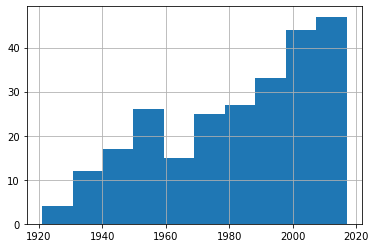

In [158]:
movies['Year'].hist()

<AxesSubplot:>

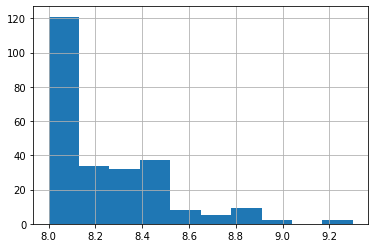

In [159]:
movies['imdbRating'].hist()

Для более глубокой визуализации построим столбчатую диаграмму с категориями рейтинга от большего к меньшему.

Далее посмотрим визуализации распредленения категорий рейтинга в соответствии с категориями годов. Для более читаемой визуализации сразу преобразуем график в таблицу. Выводы будут сделаны ниже.

<AxesSubplot:>

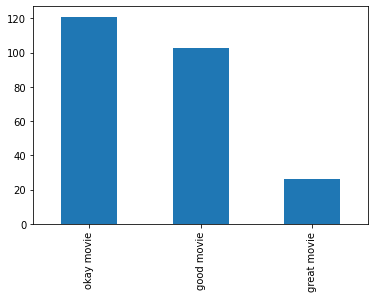

In [112]:
movies['Rating Category'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Year Category,None'>

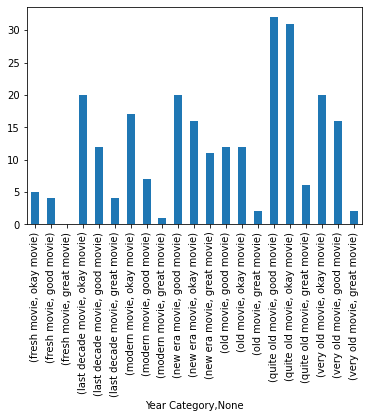

In [163]:
movies.groupby('Year Category')['Rating Category'].value_counts().plot(kind='bar')

In [162]:
movies.groupby('Year Category')['Rating Category'].value_counts().unstack()

,good movie,great movie,okay movie
Year Category,,,
fresh movie,4,0,5
last decade movie,12,4,20
modern movie,7,1,17
new era movie,20,11,16
old movie,12,2,12
quite old movie,32,6,31
very old movie,16,2,20


<AxesSubplot:xlabel='Year Category'>

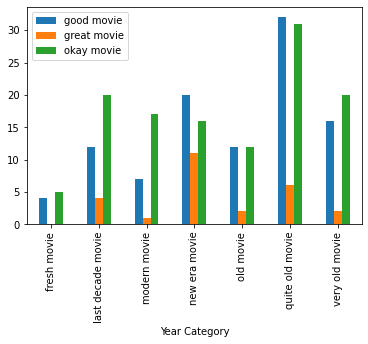

In [164]:
movies.groupby('Year Category')['Rating Category'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Year Category'>

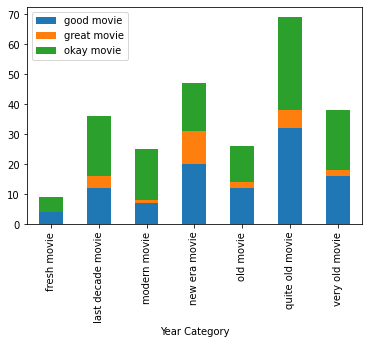

In [165]:
movies.groupby('Year Category')['Rating Category'].value_counts().unstack().plot(kind='bar',
                                                                               stacked=True)

Применив атрибуты визуализации, нам удалось отобразить информацию в наиболее читаемом виде, по которому мы можем сделать основные выводы.
В датасет присутвуют фильмы с оценкой 7.5-8.5, выпущенные с 2015 по 2022. Отличных фильмов с оценкой выше 8.5 не представлено. Также стоит заметить, что в этом периоде предоставлено наименьшее количество картин.  
Интересно отметить, что отличные фильмы (с рейтингом выше 8.5) в основном выпусклись в период с 1991 по 2001 гг.
Наибольшее количество оценок представлено в периоде 1951-1981, скорее всего это связано с более широким временным отрезком.

# Меры центральной тенденции
Найдем среднее арифметическое, медиану и моду из имеющейся рейтингов.

Для поиска медианы отсортируем колонку рейтингов от меньшего к большему, затем найдем середину и увидим, какое значение делит выборку пополам. 

Моду найдем через value_counts, т.к. с помощью данной команды возвращаем отсортированные значения от большего к меньшему.

Далее отобразим все описательные статистики для изучаемой колонки с помощью функции describe.

In [219]:
movies['imdbRating'].sum() / len(movies['imdbRating'])

8.244

In [223]:
rating_sorted = movies['imdbRating'].sort_values().reset_index(drop=True)
print(len(rating_sorted))
ind_1, ind_2 = int(len(rating_sorted)/2), int((len(rating_sorted) + 2)/2)
print((rating_sorted[ind_1] + rating_sorted[ind_2]) / 2)

250
8.2


In [230]:
movies['imdbRating'].value_counts().head(1)

8.1    70
Name: imdbRating, dtype: int64

In [232]:
movies['imdbRating'].describe()

count    250.000000
mean       8.244000
std        0.245735
min        8.000000
25%        8.100000
50%        8.200000
75%        8.375000
max        9.300000
Name: imdbRating, dtype: float64

Теперь используем меры центральных тенденций в качестве агрегирующих статистик. Сгруппироуем датасет по годам и найдем какой в среднем рейтинг фильмы получали в год.

In [236]:
movies.groupby('Year')['imdbRating'].mean()

Year
1921    8.300000
1925    8.200000
1926    8.200000
1930    8.100000
1931    8.600000
          ...   
2013    8.100000
2014    8.228571
2015    8.100000
2016    8.120000
2017    8.250000
Name: imdbRating, Length: 85, dtype: float64

Найдем моду для каждой категории рейтинга с помощью функции agg. Посмотрим какая у нас была категория рейтинга в категории годов.

Далее найдем средний показатель и моду рейтинга для каждой категориии года. Выведем в читаемый дата фрейм.

In [248]:
movies.groupby('Year Category')['Rating Category'].agg(lambda x: x.value_counts().index[0])

Year Category
fresh movie          okay movie
last decade movie    okay movie
modern movie         okay movie
new era movie        good movie
old movie            good movie
quite old movie      good movie
very old movie       okay movie
Name: Rating Category, dtype: object

In [249]:
movies.groupby('Year Category')['imdbRating'].agg(func=['mean', 'median'])

,mean,median
Year Category,,
fresh movie,8.177778,8.1
last decade movie,8.238889,8.1
modern movie,8.168000,8.1
new era movie,8.342553,8.3
old movie,8.223077,8.2
quite old movie,8.252174,8.2
very old movie,8.192105,8.1


Таким образом, можем сделать вывод, что для большинства промежутков лет 8.1 было наиболее частой медианой, а среднее ар. варьировалось между 8.1 и 8.2. Наиболее замтеный рост показателей произошел в промежутке 1991-2001, где среднее и медиана на уровне 8.3.

Теперь создадим таблицу с агрегированными данными по рейтингу и годам. Среднее ар. годов нас не интересует, оно не информативно, однако медиана показывает, какой год был средним для значений. 

In [255]:
movies.pivot_table(index='Rating Category', 
                  values=['imdbRating', 'Year'],
                  aggfunc=['mean', 'median'])

mean            median           
                        Year imdbRating   Year imdbRating
Rating Category                                          
good movie       1980.174757   8.326214   1983       8.30
great movie      1987.923077   8.784615   1994       8.75
okay movie       1983.677686   8.057851   1989       8.10

# Меры разброса
Найдем суммарный разброс рейтингов по годам. Отображаем разброс в формате дата фрейма.

In [266]:
movies_year = pd.DataFrame(movies.groupby('Year')['imdbRating'].sum())

<AxesSubplot:xlabel='Year'>

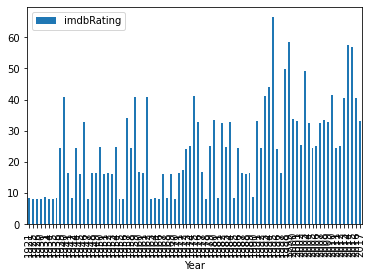

In [257]:
movies_year.plot(kind='bar')

Из-за большого количества годов у нас получается не читаемый график, однако мы видим, что в разные года успех фильмов был разный, ближе к нашему времени сумма рейтингов фильмов растет с некоторыми отклонениями. 

Найдем размах сумм значений рейтингов по категориям годов.

In [269]:
movies_year['imdbRating'].max() - movies_year['imdbRating'].min()

58.400000000000006

Теперь найдем интерквартильный размах.

In [271]:
movies_year['imdbRating'].quantile(0.75) - movies_year['imdbRating'].quantile(0.25)

17.0

Перцентили:

In [272]:
print(np.percentile(movies_year['imdbRating'], 25))
print(np.quantile(movies_year['imdbRating'], 0.25))

16.0
16.0


In [278]:
print(movies_year['imdbRating'].var()) # найдем дисперсию
print(movies_year['imdbRating'].std()) # найдем среднее отклонение

197.08799719887958
14.038803268045307


Сгруппируем по среднекдратичным отклонениям для каждого года. Также можем агрегировать среднее и среднеквадратичное отклонение.

In [280]:
movies.groupby('Year')['imdbRating'].std()

Year
1921         NaN
1925         NaN
1926         NaN
1930         NaN
1931         NaN
          ...   
2013    0.070711
2014    0.221467
2015    0.081650
2016    0.083666
2017    0.191485
Name: imdbRating, Length: 85, dtype: float64

In [281]:
movies.groupby('Year')['imdbRating'].agg(['mean', 'std'])

,mean,std
Year,,
1921,8.300000,NaN
1925,8.200000,NaN
1926,8.200000,NaN
1930,8.100000,NaN
1931,8.600000,NaN
...,...,...
2013,8.100000,0.070711
2014,8.228571,0.221467
2015,8.100000,0.081650


Перейдем к пивотальой таблице, но сначала опредлим собственную функцию, которая расчитывает размах.
Группируем датасет по категориям рейтинга по рейтингу и годам. Функциями для агригации назначим дисперсию,среднеквадратичное отклонение и нашу функцию размаха.

In [283]:
def range_values(x):
    return x.max() - x.min()

movies.pivot_table(index='Rating Category', 
                  values=['imdbRating', 'Year'],
                  aggfunc=['std', 'var', range_values])

mean                   std                    var  \
                        Year imdbRating       Year imdbRating        Year   
Rating Category                                                             
good movie       1980.174757   8.326214  25.207930   0.115437  635.439749   
great movie      1987.923077   8.784615  19.546709   0.189087  382.073846   
okay movie       1983.677686   8.057851  25.398561   0.049585  645.086915   

                           range_values             
                imdbRating         Year imdbRating  
Rating Category                                     
good movie        0.013326           96        0.3  
great movie       0.035754           83        0.7  
okay movie        0.002459           87        0.1

# Z-оценка
В данном блоке рассмотрим рейтинг фильмов, произведенных только в США (лидер по сумме рейтингов) и только в Великобритании, занимает второе место по сумме рейтингов, как индивидуальный производитель. 

In [287]:
import scipy.stats #импортируем статистическую бибилотеку

<AxesSubplot:>

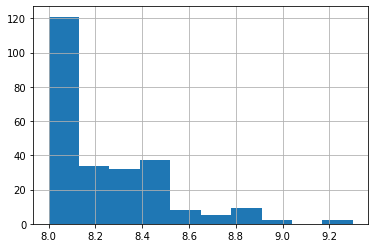

In [327]:
movies['imdbRating'].hist()

In [329]:
usa = movies[movies['Country'] == 'USA']
usa.describe()

,Unnamed: 0,Num,Year,imdbRating,Most voted,Most Recomended
count,165.000000,165.000000,165.000000,165.000000,165.0,165.0
mean,126.290909,127.290909,1976.248485,8.240000,1.0,0.0
std,74.461565,74.461565,25.542744,0.253223,0.0,0.0
min,0.000000,1.000000,1921.000000,8.000000,1.0,0.0
25%,61.000000,62.000000,1954.000000,8.100000,1.0,0.0
50%,127.000000,128.000000,1976.000000,8.200000,1.0,0.0
75%,194.000000,195.000000,1998.000000,8.400000,1.0,0.0
max,247.000000,248.000000,2017.000000,9.300000,1.0,0.0


<AxesSubplot:>

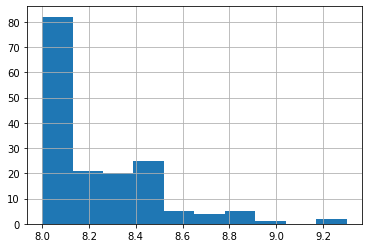

In [330]:
usa['imdbRating'].hist()

In [331]:
uk = movies[movies['Country'] == 'UK']
uk.describe()

,Unnamed: 0,Num,Year,imdbRating,Most voted,Most Recomended
count,8.00000,8.00000,8.000000,8.000000,8.0,8.0
mean,134.00000,135.00000,1971.625000,8.162500,1.0,0.0
std,46.01863,46.01863,21.367114,0.106066,0.0,0.0
min,82.00000,83.00000,1945.000000,8.000000,1.0,0.0
25%,104.50000,105.50000,1949.000000,8.100000,1.0,0.0
50%,129.50000,130.50000,1977.000000,8.150000,1.0,0.0
75%,150.25000,151.25000,1985.500000,8.225000,1.0,0.0
max,228.00000,229.00000,1998.000000,8.300000,1.0,0.0


<AxesSubplot:>

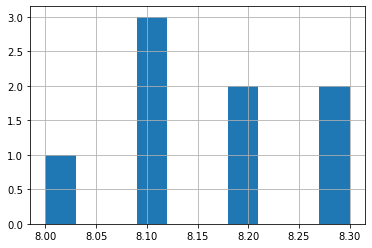

In [332]:
uk['imdbRating'].hist()

Найдем z-score, считаем, что у нас генеральная совокупность.

In [333]:
X = usa['imdbRating'][0] # извлекаем X — считаем z-оценку для первого фильма США
M = usa['imdbRating'].mean()
sigma = usa['imdbRating'].std(ddof=0)
print(X, M, sigma)
z_score = (X - M) / sigma
print(z_score)

9.3 8.240000000000007 0.2524546163834872
4.19877447750774


Счиатем z-scor с помощью специальной функции, получаем массив данных и отображаем наш датасет. Проделываем все то же самое с показателями Великобритании.

In [334]:
scipy.stats.zscore(usa['imdbRating'])

0      4.198774
1      3.802664
2      3.010442
4      2.614331
5      2.614331
         ...   
243   -0.950666
244   -0.950666
245   -0.950666
246   -0.950666
247   -0.950666
Name: imdbRating, Length: 165, dtype: float64

In [335]:
usa['z-score'] = scipy.stats.zscore(usa['imdbRating'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5504\3899210635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['z-score'] = scipy.stats.zscore(usa['imdbRating'])


In [336]:
usa.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,...,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category,z-score
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie,4.198774
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",...,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie,3.802664
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",...,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie,3.010442
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,...,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie,2.614331
5,5,6,Schindler's List,1993,1994-02-04,195 min,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally (book), Steven Zaillian (scree...","English, Hebrew, German, Polish",...,Won 7 Oscars. Another 71 wins & 33 nominations.,8.9,"937,837",NaN,Universal Pictures,1,great movie,0,new era movie,2.614331


In [337]:
uk['z-score'] = scipy.stats.zscore(uk['imdbRating'])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5504\2889411304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['z-score'] = scipy.stats.zscore(uk['imdbRating'])


In [338]:
uk.head()

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,...,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category,z-score
82,82,83,Monty Python and the Holy Grail,1975,1975-05-25,91 min,"Adventure, Comedy, Fantasy","Terry Gilliam, Terry Jones","Graham Chapman, John Cleese, Eric Idle, Terry ...","English, French, Latin",...,2 wins & 2 nominations.,8.3,"408,671",NaN,Almi Cinema 5,1,good movie,0,quite old movie,1.385870
91,91,92,The Third Man,1949,1949-08-31,93 min,"Film-Noir, Mystery, Thriller",Carol Reed,"Graham Greene (by), Graham Greene (screen play)","English, German, Russian",...,Won 1 Oscar. Another 4 wins & 4 nominations.,8.3,"122,343",NaN,Rialto Pictures,1,good movie,0,very old movie,1.385870
109,109,110,"Lock, Stock and Two Smoking Barrels",1998,1998-08-28,107 min,"Comedy, Crime",Guy Ritchie,Guy Ritchie,English,...,Nominated for 1 BAFTA Film Award. Another 13 w...,8.2,"442,704",NaN,Gramercy Pictures,1,good movie,0,new era movie,0.377964
121,121,122,Trainspotting,1996,1996-08-09,94 min,Drama,Danny Boyle,"John Hodge (screenplay), Irvine Welsh (novel)",English,...,Nominated for 1 Oscar. Another 23 wins & 32 no...,8.2,"517,568",NaN,Miramax Films,1,good movie,0,new era movie,0.377964
138,138,139,Life of Brian,1979,1979-08-17,94 min,Comedy,Terry Jones,"Graham Chapman, John Cleese, Terry Gilliam, Er...","English, Latin",...,NaN,8.1,"291,865",NaN,Warner Bros. Pictures,1,okay movie,0,quite old movie,-0.629941


Мы посчитали z-score, теперь сравниваем страны, собираем их в единый датафрейм

In [342]:
movies_new = pd.concat([usa, uk])
movies_new

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,...,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category,z-score
0,0,1,The Shawshank Redemption,1994,1994-10-14,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...",English,...,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",NaN,Columbia Pictures,1,great movie,0,new era movie,4.198774
1,1,2,The Godfather,1972,1972-03-24,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","English, Italian, Latin",...,Won 3 Oscars. Another 23 wins & 27 nominations.,9.2,"1,243,444",NaN,Paramount Pictures,1,great movie,0,quite old movie,3.802664
2,2,3,The Godfather: Part II,1974,1974-12-20,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","English, Italian, Spanish, Latin, Sicilian",...,Won 6 Oscars. Another 10 wins & 20 nominations.,9.0,"856,870",NaN,Paramount Pictures,1,great movie,0,quite old movie,3.010442
4,4,5,12 Angry Men,1957,1957-04-01,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)",English,...,Nominated for 3 Oscars. Another 16 wins & 8 no...,8.9,"494,215",NaN,Criterion Collection,1,great movie,0,quite old movie,2.614331
5,5,6,Schindler's List,1993,1994-02-04,195 min,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally (book), Steven Zaillian (scree...","English, Hebrew, German, Polish",...,Won 7 Oscars. Another 71 wins & 33 nominations.,8.9,"937,837",NaN,Universal Pictures,1,great movie,0,new era movie,2.614331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,122,Trainspotting,1996,1996-08-09,94 min,Drama,Danny Boyle,"John Hodge (screenplay), Irvine Welsh (novel)",English,...,Nominated for 1 Oscar. Another 23 wins & 32 no...,8.2,"517,568",NaN,Miramax Films,1,good movie,0,new era movie,0.377964
138,138,139,Life of Brian,1979,1979-08-17,94 min,Comedy,Terry Jones,"Graham Chapman, John Cleese, Terry Gilliam, Er...","English, Latin",...,NaN,8.1,"291,865",NaN,Warner Bros. Pictures,1,okay movie,0,quite old movie,-0.629941
149,149,150,Kind Hearts and Coronets,1949,1950-06-14,106 min,"Comedy, Crime",Robert Hamer,"Roy Horniman (novel), Robert Hamer (screenplay...",English,...,Nominated for 1 BAFTA Film Award. Another 3 wi...,8.1,"29,245",NaN,Ealing Studios,1,okay movie,0,very old movie,-0.629941
154,154,155,Brief Encounter,1945,1946-08-24,86 min,"Drama, Romance",David Lean,NaN,English,...,Nominated for 3 Oscars. Another 3 wins.,8.1,"28,038",NaN,Universal Pictures,1,okay movie,0,very old movie,-0.629941


Теперь у нас есть колонка, по которой мы можем сравнить США и Великобританию.

<AxesSubplot:>

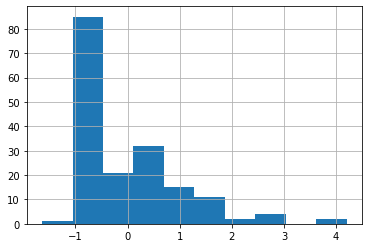

In [340]:
movies['z-score'].hist()

Мы видим, что основная часть фильмов сосредтоточена на промежутке от -1 до -0.5.

Посмотрим, сколько фильмов, которые демонстриуют рейтинг хуже, чем 3 стандартных отклонения.

In [357]:
movies_new[movies['z-score'] < -3]

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,...,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category,z-score


In [356]:
movies_new[movies['z-score'] < -1]

,Unnamed: 0,Num,Title,Year,Released,Runtime,Genre,Director,Writer,Language,...,Awards,imdbRating,imdbVotes,BoxOffice,Production,Most voted,Rating Category,Most Recomended,Year Category,z-score
228,228,229,Pink Floyd: The Wall,1982,1982-09-17,95 min,"Animation, Drama, Fantasy",Alan Parker,"Roger Waters (album ""The Wall""), Roger Waters ...",English,...,Won 2 BAFTA Film Awards. Another 1 win & 1 nom...,8.0,"63,190",NaN,United Artists,1,okay movie,0,old movie,-1.637846


Сгруппируем наш датафрейм и посмотрим, какие z оценки принимают фильмы, исходя из деления по категориям рейтинга.

In [355]:
movies_new.groupby('Rating Category')['z-score'].mean()

Rating Category
good movie     0.381997
great movie    2.218220
okay movie    -0.749413
Name: z-score, dtype: float64

Как и следовало ожидать, "отличные фильмы" зафикисрованы на уровне выше среднего.

# Визуализация
Для этого применяем библиотеку matplotlib.

Посмотроим столбчатую диаграмму, для этого объединим датафрейм по месяцам, для каждого месяца найдем средний рейтинг

In [362]:
import matplotlib.pyplot as plt

In [364]:
month_movie = movies.groupby(movies['Released'].dt.month)['imdbRating'].mean()
month_movie

Released
1.0     8.168750
2.0     8.300000
3.0     8.390000
4.0     8.211111
5.0     8.309091
6.0     8.211111
7.0     8.281818
8.0     8.133333
9.0     8.268421
10.0    8.256250
11.0    8.207692
12.0    8.204762
Name: imdbRating, dtype: float64

В основном средний рейтиг держится примерно на одном уровне в течение всего годо. Однако, если поссмотреть внимательно, можно проследить некоторую закономерность. 

Наиболее низкий рейтинг проселживается в 1-м месяце, т.е. в январе. Можем предоположить, что в этот период выходят новогодние фильмы и люди смотрят их только в опредленный период, они ориентированы на более узкую ЦА.
Самый высокий средний рейтинг в мае - 8.3, можем предположить, что в этот период часто выходят фильмы о лете. Такой жанр популярен у наиболее широкой ЦА, люди смотрят такие фильмы круглый год.

Теперь построим график.

<BarContainer object of 12 artists>

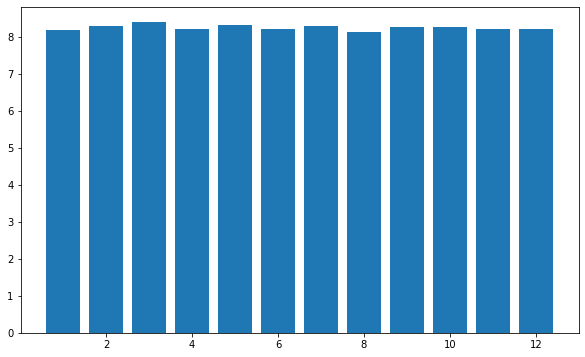

In [365]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(month_movie.index, month_movie)

Как и было сказано ранее, в течение всего года средний рейтинг держится на одном уровне.

Построим линейный график. Группируем по неделям - посмотрим, на суммы рейтинга по каждой неделе. Группировка будет проходит следующим образом 1-я неделя 1921 + 1 неделя 1922 года и т.д.


In [371]:
movies_sum = movies.groupby(movies['Released'].dt.isocalendar().week)['imdbRating'].sum()
movies_sum

week
1     32.2
2     24.9
3     41.0
4     32.6
5     25.3
6     32.7
7     16.7
8     16.4
9     16.6
10    17.1
11    24.4
12    25.6
13    16.7
14    24.9
15    16.5
16    24.5
18    16.2
21    58.8
22    16.4
23    32.2
24    24.9
25    74.3
26    16.4
27    41.9
28     8.0
29     8.2
30    17.0
31    24.1
32    24.4
33    24.6
34    40.4
35    33.0
36    57.6
37    16.3
38    49.8
39    33.3
40     8.1
41    34.4
42    41.0
43    40.2
44    32.9
46     8.1
47    49.6
48    24.1
49    33.0
50    32.6
51    57.8
52    40.9
Name: imdbRating, dtype: float64

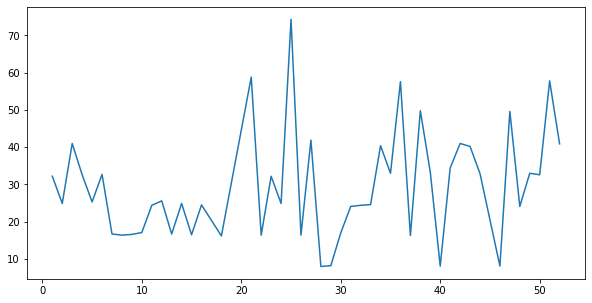

In [373]:
fig, ax = plt.subplots(figsize=(10,5)) #задаем размерность линейного графика
ax.plot(movies_sum)

Теперь добавим агрегацию по категориям рейтинга по месяцам.

In [379]:
movies.groupby(['Rating Category', 'Released'])['imdbRating'].sum()

Rating Category  Released  
good movie       1921-02-06    8.3
                 1927-02-24    8.2
                 1930-08-24    0.0
                 1931-03-07    0.0
                 1934-02-22    8.2
                              ... 
okay movie       2016-02-12    8.0
                 2016-03-04    8.1
                 2016-12-25    0.0
                 2017-05-05    8.1
                 2017-07-07    8.1
Name: imdbRating, Length: 510, dtype: float64

Выше отображены категории рейтингов с разбивкой по датам и рейтингам.

Построим в одной области координат графики для каждой категории рейтинга. Цвет отображает категорию рейтинга. Также добавим легенду на график.

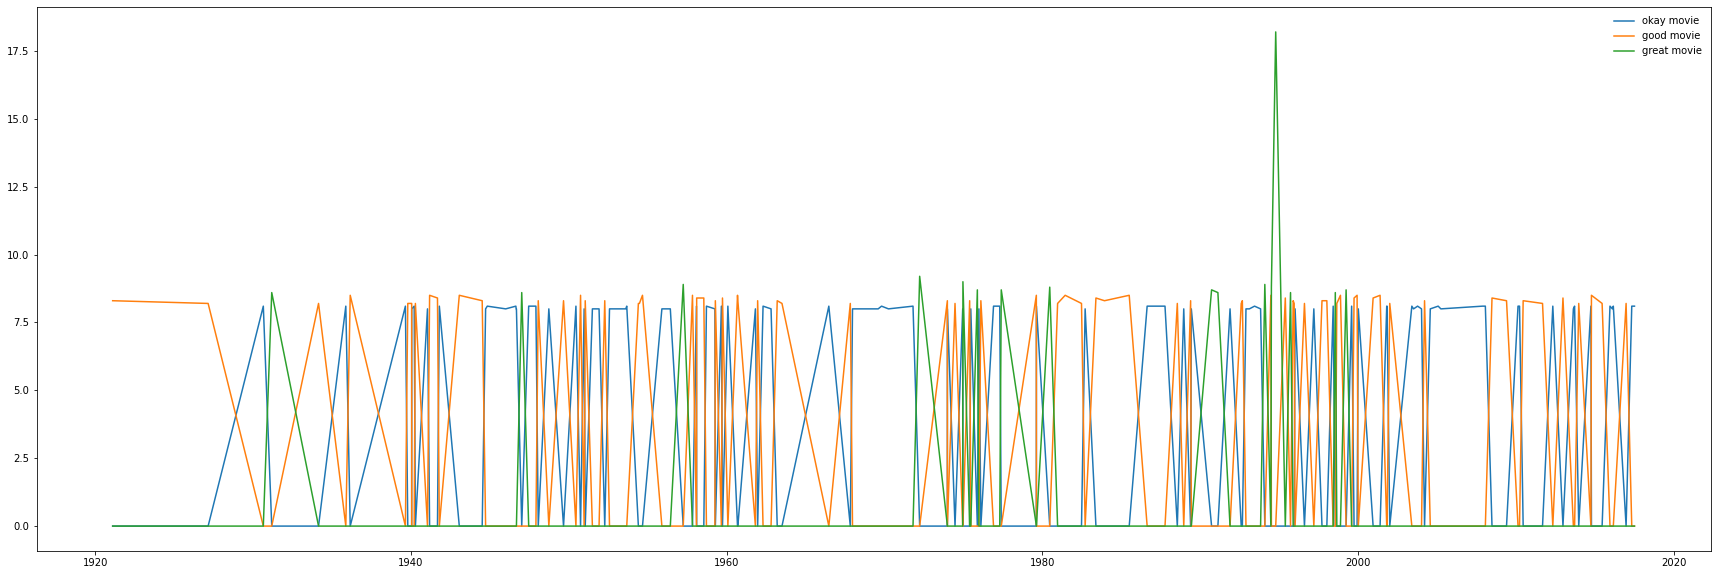

In [383]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(movies.groupby(['Rating Category', 'Released'])['imdbRating'].sum().loc['okay movie'])
ax.plot(movies.groupby(['Rating Category', 'Released'])['imdbRating'].sum().loc['good movie'])
ax.plot(movies.groupby(['Rating Category', 'Released'])['imdbRating'].sum().loc['great movie'])
ax.legend(['okay movie', 'good movie', 'great movie'], frameon=False)

Как мы не раз замечали в текущем анализе, в период в конце XX начале XXI прослеживается явный скачек в сумме рейтингов. Это говорит о том, что в этот период были наиболее высокие оценки.
Теперь в рамках одного рисинка добавим несколько осей координат. Найдем для каждого года средний рейтинг и сгруппируем по категориям рейтинга. Создадим рисунок с тремя областями координат.
Также приведем шкалы координат к единому виду.

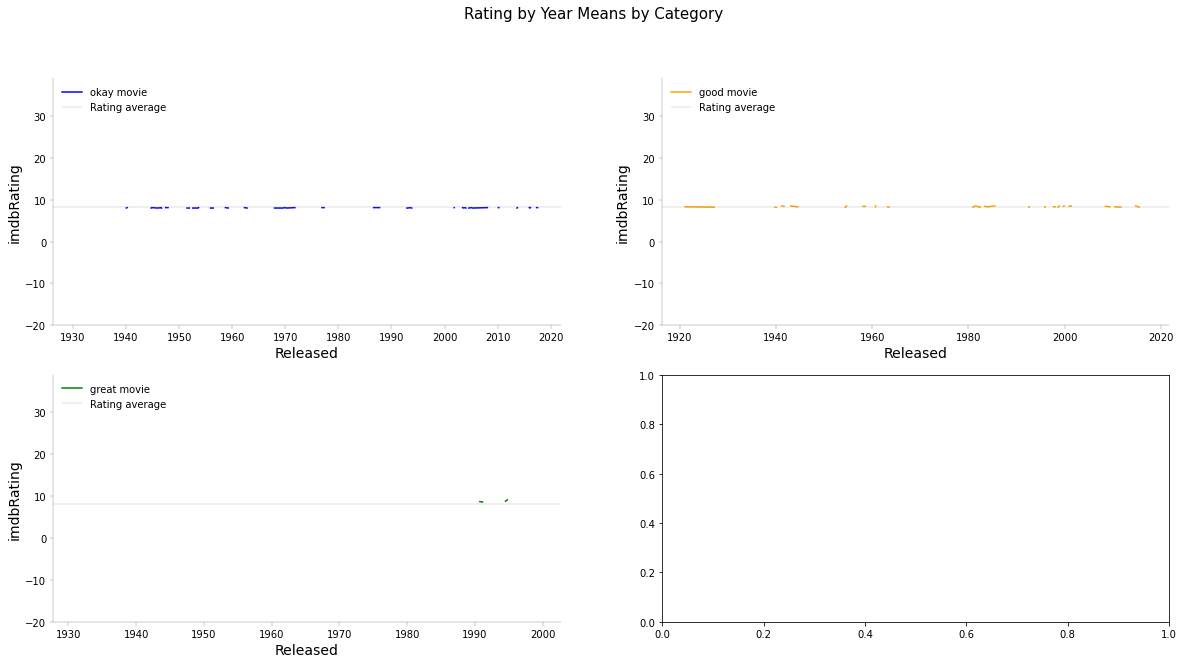

In [407]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0][0].plot(movies.groupby(['Rating Category', 'Released'])['imdbRating'].mean().loc['okay movie'], c='blue')
ax[0][1].plot(movies.groupby(['Rating Category', 'Released'])['imdbRating'].mean().loc['good movie'], c='orange')
ax[1][0].plot(movies.groupby(['Rating Category', 'Released'])['imdbRating'].mean().loc['great movie'], c='green')

for axis, rating_category in zip(ax.ravel(), ['okay movie', 'good movie', 'great movie']):
    axis.set_xlabel('Released', fontsize=14)
    axis.set_ylabel('imdbRating', fontsize=14)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['left'].set_linewidth(0.2)
    axis.spines['bottom'].set_linewidth(0.2)
    axis.xaxis.set_tick_params(width=0.2)
    axis.yaxis.set_tick_params(width=0.2)
    axis.set_ylim(-20, 39)
    axis.axhline(8.2, c='grey', lw=0.25)
    axis.legend([rating_category, 'Rating average'], frameon=False, loc=2) #Созадли легенды

        
fig.suptitle('Rating by Year Means by Category', fontsize=15) #Созадли заголовок
fig.savefig('rating.pdf')
fig.savefig('rating.png', dpi=100)

Графики получились достаточно "рваные" из-за того, что поделены на категории и не в кажом переоде присутствует оценка. Наибольшая динамика оценок прослеживается среди "нормальных фильмов".
Серая линия проведена на уровне 8.2., т.к. это наш средний рейтинг по годам. Ниже подтвреждение, ширина линии - 0.25.


In [401]:
movies['imdbRating'].describe()

count    173.000000
mean       8.236416
std        0.248724
min        8.000000
25%        8.100000
50%        8.200000
75%        8.300000
max        9.300000
Name: imdbRating, dtype: float64

# Разведочный анализ данных

In [418]:
import seaborn as sns

Посмотрим распределение по годам с помощью библиотеки seaborn.

<AxesSubplot:xlabel='Year', ylabel='Count'>

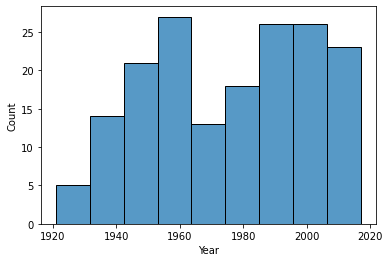

In [420]:
sns.histplot(movies['Year'])

Наименьшее количество фильмов было выпущено в самом начале киноиндустрии, далее был устойчивый рост до 1960, а в 70-х было зафикисировано резкое и устойчивое падении, далее кинопроизводители снова вышли на линюю устойчивогороста с небольшим падением в 2010-х. Стоит напомнить, что речь не производстве фильмов в мире, а только о 250 лучших фильмов. То есть в указанные периоды не удавалось создавать лучшие картины.

In [421]:
movies['Year'].value_counts()

1999    5
1959    5
1940    5
1995    5
1994    4
       ..
1925    1
1963    1
2009    1
1921    1
1942    1
Name: Year, Length: 79, dtype: int64

Сделаем столбчатый красивый график распределения рейтингов. Наиболее популярной оценкой является 8.1, наименьшее количество фильмов получило оценку 9.0.

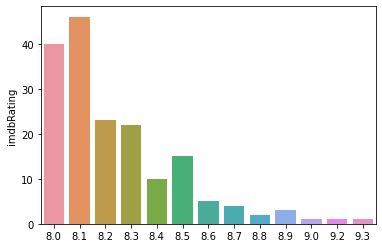

In [423]:
sns.barplot(x=movies['imdbRating'].value_counts().index, y=movies['imdbRating'].value_counts())
plt.show()

Далее посмотрим распредление количественной переменной рейтинга по категориальной.

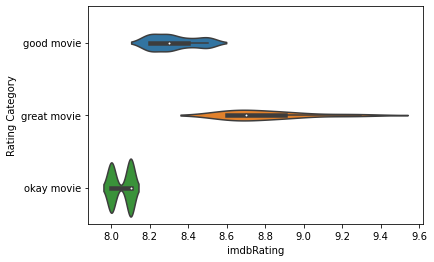

In [433]:
sns.violinplot(x=movies['imdbRating'], y=movies['Rating Category'])
plt.show()

Отличные фильмы - в меньшенстве, полоска совсем узкая, номальные фильмы лидируют в нашем датасете.
У нормальных фильмов больше всего оценок 8.1, у хороших фильмов - 8.3, а у отличных фильмов - 8.7

<AxesSubplot:xlabel='Year', ylabel='Count'>

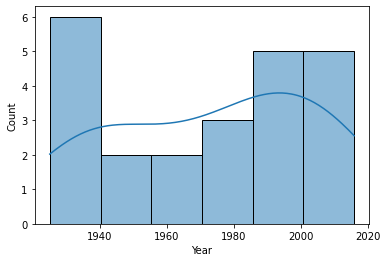

In [430]:
sns.histplot(movies[movies['imdbRating']==8.2]['Year'], kde=True)

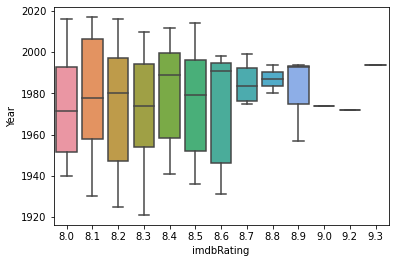

In [432]:
sns.boxplot(x=movies['imdbRating'], y=movies['Year'])
plt.show()